## Ignasius Maret Ismoyo

## -----------------------------------------------
## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## -----------------------------------------------
## Upload File

In [2]:
df = pd.read_csv("G:\My Drive\latihan_coding\jobs_and_salaries\jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


## -----------------------------------------------
## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
print(f"Rows = {df.shape[0]}, Columns = {df.shape[1]}")
print(f"Total duplicated data = {df.duplicated().sum()}")
print(f"Total NaN values = {df.isna().sum().sum()}")
print(f"Total Null values = {df.isnull().sum().sum()}")

Rows = 9355, Columns = 12
Total duplicated data = 4014
Total NaN values = 0
Total Null values = 0


In [5]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

## -----------------------------------------------
## Top 5 Job Titles

In [6]:
job_title = df["job_title"].value_counts().head(5)
print(job_title)

job_title
Data Engineer                2195
Data Scientist               1989
Data Analyst                 1388
Machine Learning Engineer     991
Applied Scientist             272
Name: count, dtype: int64


In [7]:
# fig = px.bar(
#     df.job_title.value_counts().head(5).reset_index(name="Count"),
#     x="job_title",
#     y="Count",
#     title="Top 10 Job Titles",
#     color="job_title",
# )
# fig.show()

Text(0.5, 1.0, 'Top 5 Job Titles')

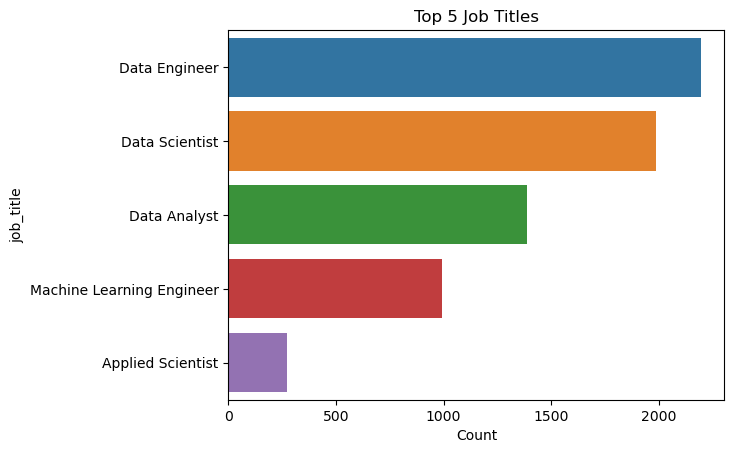

In [8]:
sns.barplot(
    data=df.job_title.value_counts()
    .sort_values(ascending=False)
    .reset_index(name="Count")
    .head(5),
    x="Count",
    y="job_title",
)
plt.title("Top 5 Job Titles")

In [9]:
df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(5)

job_title
Analytics Engineering Manager     399880.0
Data Science Tech Lead            375000.0
Managing Director Data Science    300000.0
Head of Machine Learning          259000.0
AWS Data Architect                258000.0
Name: salary_in_usd, dtype: float64

In [10]:
fig = px.bar(
    df.groupby("job_title")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name="Average Salary"),
    x="Average Salary",
    y="job_title",
    color="Average Salary",
    title="Top 5 Average Salary by Job Titles",
)
fig.show()

In [11]:
# sns.barplot(
#     data=df.groupby("job_title")["salary_in_usd"]
#     .mean()
#     .sort_values(ascending=False)
#     .reset_index(name="Salary")
#     .head(5),
#     x="Salary",
#     y="job_title",
# )
# plt.title("Top 10 average salary in USD")

In [12]:
df.groupby(["job_title", "employee_residence"])["salary_in_usd"].mean().sort_values(
    ascending=False
).head(5)

job_title                       employee_residence
Data Analytics Lead             United States         405000.0
Analytics Engineering Manager   United Kingdom        399880.0
Data Science Tech Lead          United States         375000.0
Finance Data Analyst            France                323905.0
Managing Director Data Science  United States         300000.0
Name: salary_in_usd, dtype: float64

In [13]:
fig = px.choropleth(
    df.groupby(["job_title", "employee_residence"])["salary_in_usd"]
    .mean()
    .reset_index(name="Average Salary"),
    locations="employee_residence",
    locationmode="country names",
    color="Average Salary",
    hover_name="employee_residence",
    color_continuous_scale="plasma",
)
fig.update_geos(projection_type="natural earth", showcoastlines=True)
fig.update_layout(title_text="World Map - Average Salary by Job Title")
fig.show()

## -----------------------------------------------
## Top 5 Job Category

In [14]:
unique_job_categories = df["job_category"].value_counts().head(5)
print(unique_job_categories)

job_category
Data Science and Research    3014
Data Engineering             2260
Data Analysis                1457
Machine Learning and AI      1428
Leadership and Management     503
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 5 Job Category')

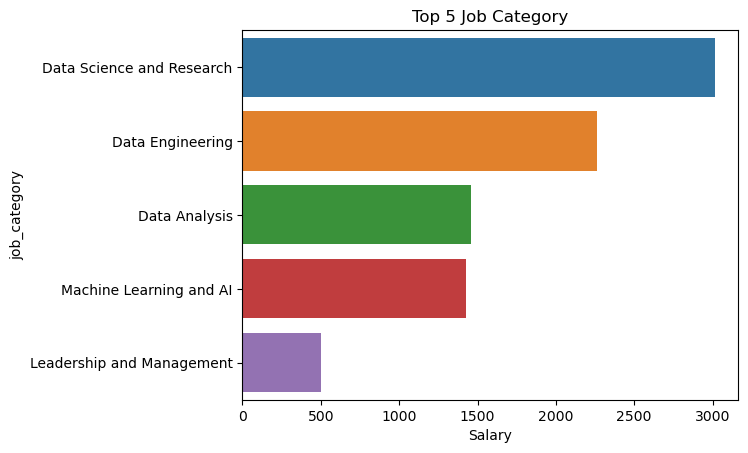

In [15]:
sns.barplot(
    data=df["job_category"]
    .value_counts()
    .sort_values(ascending=False)
    .reset_index(name="Salary")
    .head(5),
    x="Salary",
    y="job_category",
)
plt.title("Top 5 Job Category")

In [16]:
average_salary_by_job_categories = (
    df.groupby("job_category")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
average_salary_by_job_categories

job_category
Machine Learning and AI           178925.847339
Data Science and Research         163758.575979
Data Architecture and Modeling    156002.359073
Cloud and Database                155000.000000
Data Engineering                  146197.656195
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Top 5 average salary in USD by job category')

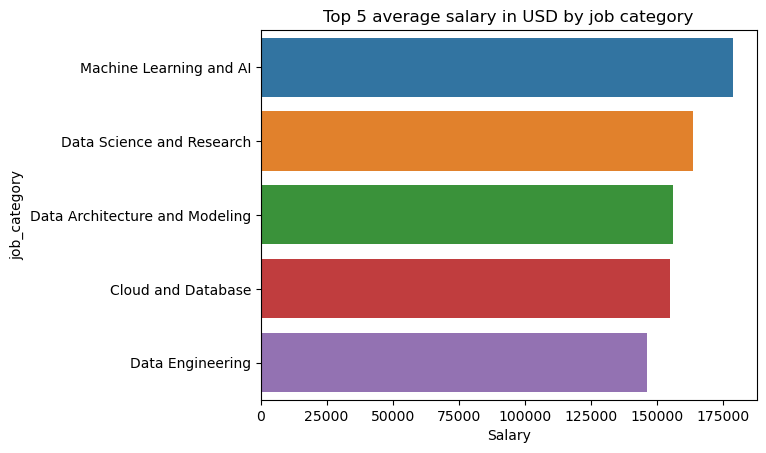

In [17]:
sns.barplot(
    data=df.groupby("job_category")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
    .reset_index(name="Salary")
    .head(5),
    x="Salary",
    y="job_category",
)
plt.title("Top 5 average salary in USD by job category")

In [18]:
df.groupby(["job_category", "employee_residence"])["salary_in_usd"].mean().sort_values(
    ascending=False
).head(5)

job_category               employee_residence
Machine Learning and AI    Qatar                 300000.0
Leadership and Management  Russia                230000.0
BI and Visualization       Nigeria               200000.0
Leadership and Management  Malaysia              200000.0
Machine Learning and AI    Australia             198068.1
Name: salary_in_usd, dtype: float64

In [19]:
fig = px.choropleth(
    df.groupby(["job_category", "employee_residence"])["salary_in_usd"]
    .mean()
    .reset_index(name="Average Salary"),
    locations="employee_residence",
    locationmode="country names",
    color="Average Salary",
    hover_name="employee_residence",
    color_continuous_scale="plasma",
)
fig.update_geos(projection_type="natural earth", showcoastlines=True)
fig.update_layout(title_text="World Map - Average Salary by Job Category")
fig.show()